In [1]:
#pip install --upgrade scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dfDiabetes = pd.read_csv('../../ml-dataset/kaggle-basico/diabetes.csv') # Carregando o dataset

## 1- Visualização dos Dados

Mostra as 5 primeiras linhas do dataset

- Pregnancies: O número de vezes que a paciente engravidou.
- Glucose: O nível de glicose no sangue da paciente.
- BloodPressure: A pressão arterial da paciente.
- SkinThickness: A espessura das camadas pele (epiderme, derme, hipoderme).
- Insulin: A quantidade de insulina no sangue da paciente.
- BMI (Body Mass Index): O índice de massa corporal da paciente.
- DiabetesPedigreeFunction: Uma medida que avalia a predisposição genética ao diabetes.
- Age: A idade da paciente.
- Outcome: Uma variável binária que indica se a paciente tem diabetes (1) ou não (0).

In [4]:
#dfDiabetes.iloc[0:5]
dfDiabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Mostra as 5 últimas linhas do dataset

In [5]:
#dfDiabetes.iloc[-5:]
dfDiabetes.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Visualizar a dimensão do dataset

In [6]:
dfDiabetes.shape

(768, 9)

Conta a quantidade de registros não nulos

In [7]:
dfDiabetes.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

Contando a quantidade de pessoas com e sem diabetes

In [8]:
#dfDiabetes.iloc[:,-1].value_counts()
dfDiabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

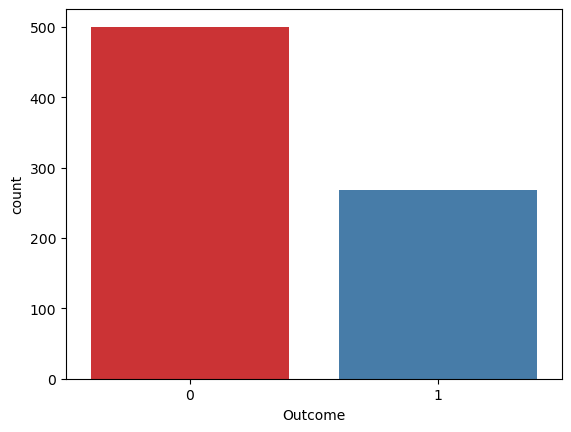

In [9]:
sns.set_palette("Set1")
sns.countplot(x='Outcome', data=dfDiabetes)
plt.show()

### 1-1 Estatísticas descritivas

- Contagem (count): O número de valores não nulos em cada coluna.
- Média (mean): A média aritmética dos valores.
- Desvio padrão (std): O desvio padrão, que mede a dispersão dos valores em relação à média.
- Valor mínimo (min): O valor mínimo na coluna.
- Percentil 25 (25%): O valor que divide os 25% menores valores da coluna.
- Mediana (50%): A mediana, que é o valor que divide a distribuição ao meio.
- Percentil 75 (75%): O valor que divide os 25% maiores valores da coluna.
- Valor máximo (max): O valor máximo na coluna.

In [10]:
dfDiabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2- Data Exploration (exploração de dados)
Busca entender as relações entre variáveis

Percentual de pacientes sem/com Diabetes

In [11]:
contagemComDiabetes = len(dfDiabetes[dfDiabetes['Outcome']==1])
contagemSemDiabetes = len(dfDiabetes[dfDiabetes['Outcome']==0])

print("Porcentagem de pacientes sem diabetes: {:.2f}%".format(
    (contagemSemDiabetes / (len(dfDiabetes['Outcome']))*100)
    ))
print("Porcentagem de pacientes com diabetes: {:.2f}%".format(
    (contagemComDiabetes / (len(dfDiabetes['Outcome']))*100)
    ))

Porcentagem de pacientes sem diabetes: 65.10%
Porcentagem de pacientes com diabetes: 34.90%


In [12]:
# Filtrar dados para não diabéticos (Outcome == 0) e diabéticos (Outcome == 1)
# O resultado da compreensão de lista é uma lista contendo dois grupos de dados
# um para 'Outcome' igual a 0 e outro para 'Outcome' igual a 1.

comDiabetes, semDiabetes = [grupo for _, grupo in dfDiabetes.groupby('Outcome')]

# Usamos o sublinhado _ (também conhecido como "underscore") como uma convenção para nome de variável 
# quando não estamos interessados em armazenar ou usar o valor associado a essa variável.

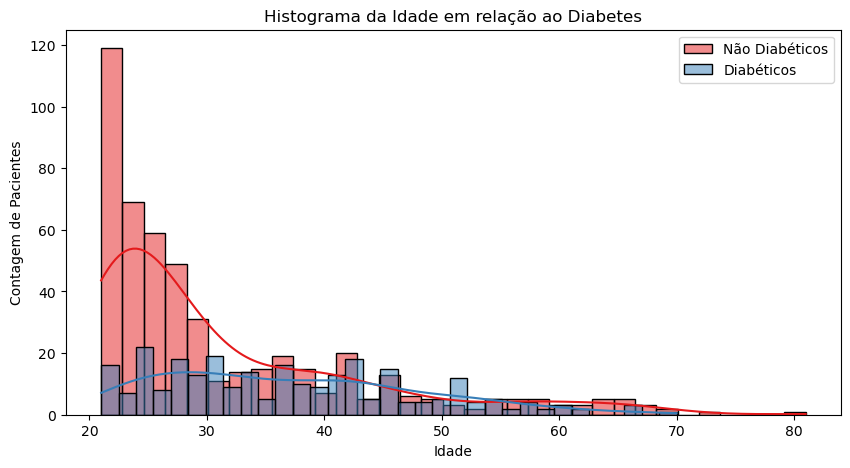

In [13]:
plt.figure(figsize=(10, 5))
sns.set_palette("Set1")

# Criar histograma para a idade de não diabéticos
sns.histplot(comDiabetes['Age'], bins=33, label='Não Diabéticos', kde=True)
# Criar histograma para a idade de diabéticos
sns.histplot(semDiabetes['Age'], bins=33, label='Diabéticos', kde=True)

# Configurar rótulos de eixo e título
plt.xlabel('Idade')
plt.ylabel('Contagem de Pacientes')
plt.title('Histograma da Idade em relação ao Diabetes')
plt.legend() # Adicionar legenda
plt.show() # Exibir o gráfico

Criar um histograma para cada variável em relação ao diabetes exceto a Classe e idade (age)


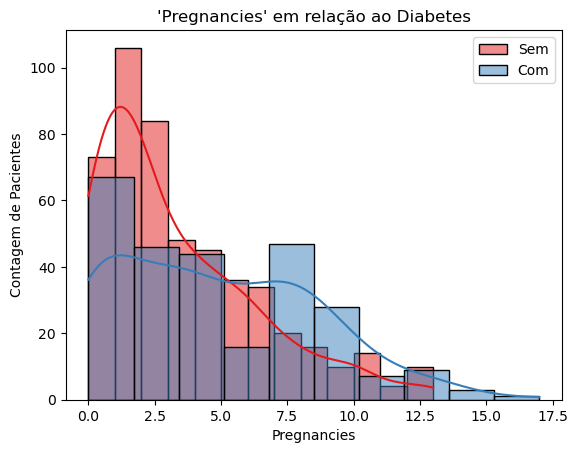

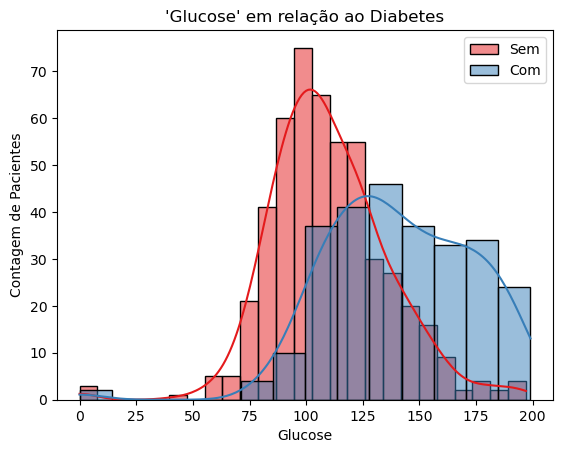

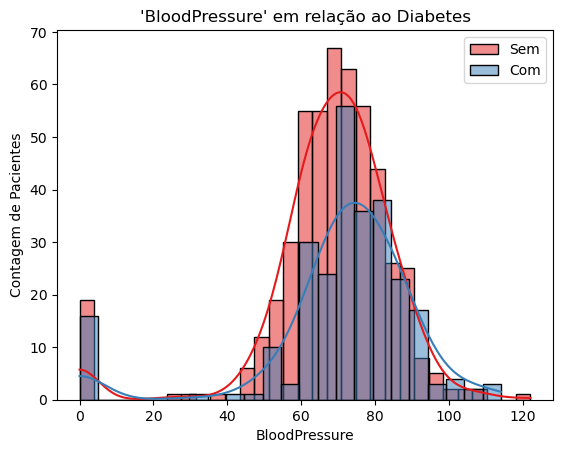

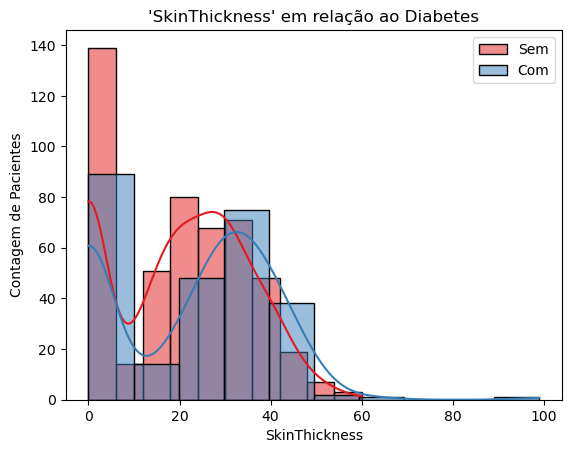

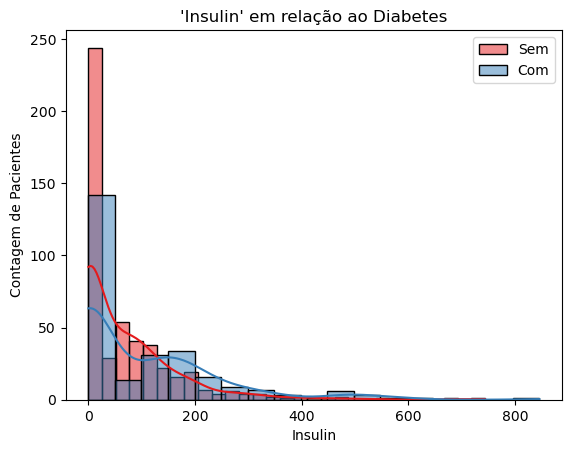

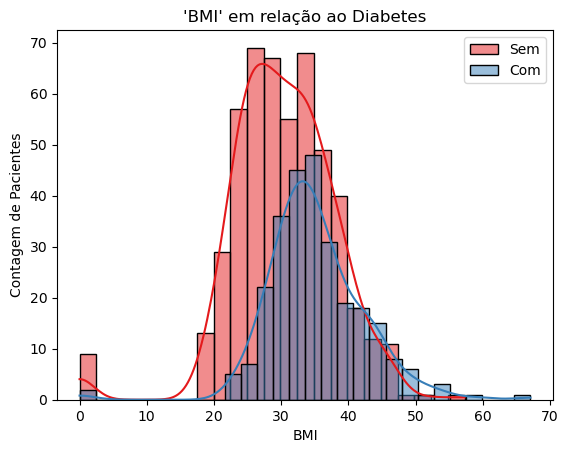

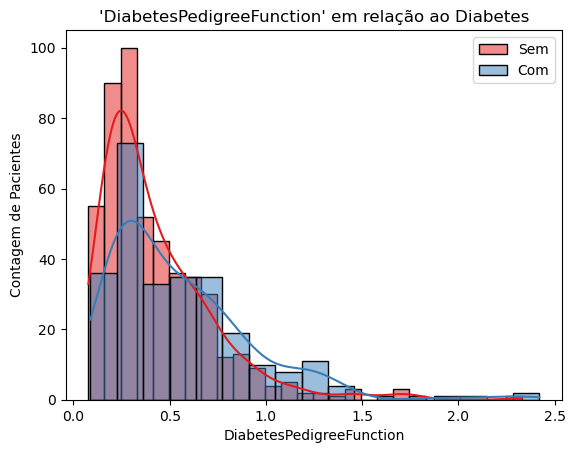

In [14]:
for variavel in dfDiabetes.columns.drop(['Outcome', 'Age']):
    plt.title(f"'{str(variavel)}' em relação ao Diabetes")
    sns.set_palette("Set1")
    plt.xlabel(str(variavel))
    plt.ylabel('Contagem de Pacientes')
    sns.histplot(dfDiabetes[dfDiabetes['Outcome'] == 0][str(variavel)], kde=True, label='Sem')
    sns.histplot(dfDiabetes[dfDiabetes['Outcome'] == 1][str(variavel)], kde=True, label='Com')
    plt.legend() # Adicionar legenda
    plt.show()

## 3- Data Preprocessing (pré-processamento dos dados)

### 3-1 Verificando se há valores nulos

In [15]:
dfDiabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 3-2 Verificar Dtype (tipo de dado) das variáveis
- int: Tipo de dado inteiro, usado para números inteiros, por exemplo, 1, 2, -3, etc.
- float: Tipo de dado de ponto flutuante, usado para números decimais, por exemplo, 3.14, -0.5, etc.
- str: Tipo de dado de string, usado para texto, por exemplo, "Olá, mundo!".
- bool: Tipo de dado booleano, usado para representar valores verdadeiro (True) ou falso (False).
- datetime: Tipo de dado para datas e horas.
- object: Tipo de dado genérico, frequentemente usado quando uma coluna de um DataFrame contém uma mistura de tipos de dados.

## Por que?

> Integridade dos dados: Verificar os dtypes ajuda a garantir a integridade dos seus dados. Isso significa que você pode identificar erros de tipo de dados, como tentar realizar operações matemáticas em dados de tipo incorreto, o que pode levar a resultados incorretos ou erros.

> Compreensão dos dados: Entender os dtypes das variáveis ajuda você a compreender melhor os dados que está trabalhando. Por exemplo, ao saber que uma coluna contém números inteiros, você sabe que essa coluna provavelmente representa quantidades discretas, enquanto uma coluna de ponto flutuante pode representar valores contínuos.

In [16]:
dfDiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 3-3 Buscar presença de zeros

> A presença de zeros em colunas onde não deveria haver zeros pode ser um sinal de erro nos dados. Por exemplo, em um conjunto de dados de pacientes, valores como idade(age), nível de glicose no sangue(glucose), pressão arterial(BloodPressure), normalmente não devem ser zero. Encontrar zeros nessas colunas pode indicar dados incorretos ou ausentes.

In [17]:
for i in dfDiabetes.columns:
    print(i,len(dfDiabetes[dfDiabetes[i] == 0]))

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


Alternativas para tratar variáveis que não deveriam ser zero
- Média/Mediana
- Valor Fixo
- Exclusão

In [18]:
### ALTERNATIVA 1
# Média ou Mediana
# A mediana é menos sensível a valores extremos (outliers) do que a média

# Substituir zeros em "Glucose" pela mediana
medianaGlucose = dfDiabetes['Glucose'].median()
dfDiabetes['Glucose'] = dfDiabetes['Glucose'].replace(0, medianaGlucose)

# Substituir zeros em "BloodPressure" pela mediana
medianaBloodPressure = dfDiabetes['BloodPressure'].median()
dfDiabetes['BloodPressure'] = dfDiabetes['BloodPressure'].replace(0, medianaBloodPressure)

In [19]:
### ALTERNATIVA 2
# Valor Fixo
# Se houver informações adicionais sobre os dados ou o domínio que sugere um valor específico 
# para imputar em vez de usar a média ou mediana. 
# Por exemplo, você pode decidir que um valor mínimo razoável para glicose ou pressão arterial é uma escolha melhor.

#dfDiabetes['Glucose'] = dfDiabetes['Glucose'].replace(0, VALOR)
#dfDiabetes['BloodPressure'] = dfDiabetes['BloodPressure'].replace(0, VALOR)

In [20]:
### ALTERNATIVA 3
# Excluir
# Se os valores zero forem poucos e você acreditar que eles representam entradas inválidas ou ruins
# você pode optar por remover as LINHAS correspondentes.

#dfDiabetes = dfDiabetes[dfDiabetes['Glucose'] != 0]
#dfDiabetes = dfDiabetes[dfDiabetes['BloodPressure'] != 0]

# Se os valores zero forem muitos, você pode optar por remover a COLUNA correspondente.

#dfDiabetes = dfDiabetes.drop(['Glucose', 'BloodPressure'], axis=1)

In [21]:
for x in dfDiabetes.columns:
    print('{}: {}'.format(
        x.upper(), 
        sorted(dfDiabetes[x].unique())
        ), '\n')

PREGNANCIES: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17] 

GLUCOSE: [44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199] 

BLOODPRESSURE: [24, 30, 38, 40, 44, 46, 48, 50, 52, 54, 55, 56, 58, 60, 61, 62, 64, 65, 66, 68, 70, 72, 74, 75, 76, 78, 80, 82, 84, 85, 86, 88, 90, 92, 94, 95, 96, 98, 100, 102, 104, 106, 108, 110, 114, 122] 

SKINTHICKNESS: [0, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2

### 3-4 Normalization of Data (normalização)

> Essa técnica garante que todas as características tenham a mesma escala e estejam dentro do intervalo especificado, facilitando a comparação e o processamento de dados, especialmente em algoritmos sensíveis à escala. A escolha da técnica de normalização depende da natureza dos dados e dos requisitos do problema.

In [22]:
X = dfDiabetes.drop('Outcome', axis=1) # Todas as colunas, exceto Classe
y = dfDiabetes['Outcome'] # Apenas a coluna Classe

In [23]:
## X_normalizado = ((x-x.min)/(x.max-x.min))

# Subtrai o valor mínimo de uma característica (x.min) do valor original (x) para centralizar os dados em zero.
# Divide o resultado pela diferença entre o valor máximo (x.max) e o valor mínimo (x.min) da característica. 
# Isso dimensiona os dados para o intervalo [0, 1].

X_normalizado = (X - X.min()) / (X.max() - X.min())

print('{} \n {}'.format(
    X.iloc[0:5], # .head()
    X_normalizado.iloc[0:5]
    ))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33   
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.353535  0.000000  0.500745   
1     0.058824  0.264516       0.428571       0.292929  0.000000  0.396423   
2     0.470588  0.896774       0.408163       0.000000  0.000000  0.347243   
3     0.058824  0.290323       0.428571    

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

### 3-5 Tratar variáveis categóricas
- OneHotEncoder
- LabelEncoder

> Variáveis categóricas são diferentes das variáveis numéricas, e muitos algoritmos de classificação funcionam com base em cálculos numéricos. Portanto, é necessário transformar ou codificar essas variáveis de forma adequada para que os algoritmos possam utilizá-las de maneira eficaz.

Cuidado para Evitar Vieses e Peso Inadequado:

> A codificação inadequada de variáveis categóricas pode levar a vieses no modelo. Por exemplo, em uma variável categórica com três categorias, uma codificação ordinal inadequada pode inadvertidamente atribuir valores numéricos que sugerem uma relação de ordem que não existe na realidade.

In [ ]:
##

## 4- Construção dos modelos preditivos

Algoritmos de aprendizado supervisionado propostos são:
- K-Nearest Neighbour (KNN)
- Árvores de Decisão (DT)
- Support Vector Machine (SVM)

### 4-1 Divisão do conjunto de dados em Treino e Teste

In [25]:
from sklearn.model_selection import train_test_split

- X_normalizado: Este é o conjunto de características que você deseja dividir em treinamento e teste.
- y: Estes são os rótulos correspondentes às características.
- test_size: Este argumento especifica a proporção dos dados que serão usados como conjunto de teste. Neste caso, 30% dos dados serão usados para teste, enquanto 70% serão usados para treinamento.
- shuffle: Se estiver definido como `True`, os dados serão embaralhados aleatoriamente antes da divisão, o que é geralmente uma prática recomendada para evitar qualquer ordem específica nos dados que possa afetar o treinamento.
- random_state: Este é um valor usado para inicializar o gerador de números aleatórios, garantindo que a divisão seja reproduzível.

In [26]:
# X, X_normalizado, X_padronizado

X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=42
    )

### 4-2 KNN
- sem ajuste de parâmetros

>  Treinar um modelo de machine learning "sem ajuste de parâmetros", significa que está usando os valores padrão dos hiperparâmetros do modelo, em vez de ajustá-los manualmente ou por meio de técnicas como busca em grade ou otimização bayesiana.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
# Instanciar o modelo com 3 vizinhos
modeloKNN = KNeighborsClassifier(n_neighbors=3)
# Ajustar o modelo aos dados de treino (treinar)
modeloKNN.fit(X_treino, y_treino)

print('Acurácia do modelo KNN: {:.2f}%'.format(
    modeloKNN.score(X_teste, y_teste)*100
    ))

Acurácia do modelo KNN: 67.97%


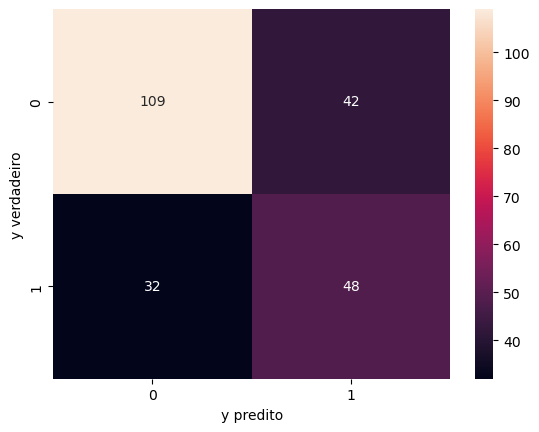

In [28]:
from sklearn.metrics import confusion_matrix

matrizConfusao = confusion_matrix(y_teste, modeloKNN.predict(X_teste))

sns.heatmap(matrizConfusao, annot=True, fmt='.0f')
plt.xlabel('y predito')
plt.ylabel('y verdadeiro')
plt.show()

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, modeloKNN.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75       151
           1       0.53      0.60      0.56        80

    accuracy                           0.68       231
   macro avg       0.65      0.66      0.66       231
weighted avg       0.69      0.68      0.68       231

